# Проектная работа
## Описание проекта
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

   - лог сервера с данными об их посещениях,
   - выгрузка их покупок за этот период,
   - рекламные расходы.

Вам предстоит изучить:

   - откуда приходят пользователи и какими устройствами они пользуются,
   - сколько стоит привлечение пользователей из различных рекламных каналов;
   - сколько денег приносит каждый клиент,
   - когда расходы на привлечение клиента окупаются,
   - какие факторы мешают привлечению клиентов.

## Описание данных
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
### Структура visits_info_short.csv:

   - User Id — уникальный идентификатор пользователя,
   - Region — страна пользователя,
   - Device — тип устройства пользователя,
   - Channel — идентификатор источника перехода,
   - Session Start — дата и время начала сессии,
   - Session End — дата и время окончания сессии.

### Структура orders_info_short.csv:

   - User Id — уникальный идентификатор пользователя,
   - Event Dt — дата и время покупки,
   - Revenue — сумма заказа.

### Структура costs_info_short.csv:

   - dt — дата проведения рекламной кампании,
   - Channel — идентификатор рекламного источника,
   - costs — расходы на эту кампанию.

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Считывание данных из CSV
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# Получим представление о visits при помощи head()
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# Получим представление об orders при помощи head()
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
# Получим представление о costs при помощи head()
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Предобработка данных
Предобработка visits

In [6]:
# Информация visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
# Проверяю visits на дубликаты
visits.duplicated().sum()

0

In [8]:
# Посчитаем пропуски
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [9]:
# Получу имена колонок visits
visits.columns.to_list()

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

In [10]:
# Переименовываю колонки на более подходящие
visits.columns = ['user_id', 'region','device', 'channel', 'session_start', 'session_end']

In [11]:
# Привожу время к необходимому формату
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
# Информация visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [13]:
# Данные идущие сначала видели, посмотрим другие
visits.tail()

,user_id,region,device,channel,session_start,session_end
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


Оформил таблицу visits. Поменял названия столбцов. Привел даты к единому формату.

Предобработка orders

In [14]:
# Информация orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [15]:
# Проверяю orders на дубликаты
orders.duplicated().sum()

0

In [16]:
# Посчитаем пропуски
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [17]:
# Получу имена колонок orders
orders.columns.to_list()

['User Id', 'Event Dt', 'Revenue']

In [18]:
# Переименовываю колонки на более подходящие
orders.columns = ['user_id','event_date','revenue']

In [19]:
# Привожу время к необходимому формату
orders['event_dt'] = pd.to_datetime(orders['event_date'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
# Информация orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     40212 non-null  int64         
 1   event_date  40212 non-null  object        
 2   revenue     40212 non-null  float64       
 3   event_dt    40212 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [21]:
# Данные идущие сначала видели, посмотрим другие
orders.tail()

,user_id,event_date,revenue,event_dt
40207,651604369137,2019-10-31 16:19:07,4.99,2019-10-31 16:19:07
40208,275341387049,2019-10-31 01:17:17,4.99,2019-10-31 01:17:17
40209,374656616484,2019-10-31 06:17:29,4.99,2019-10-31 06:17:29
40210,168548862926,2019-10-31 22:46:19,4.99,2019-10-31 22:46:19
40211,329994900775,2019-10-31 13:29:06,4.99,2019-10-31 13:29:06


Оформил таблицу orders. Поменял названия столбцов. Привел даты к единому формату.

Предобработка costs

In [22]:
# Информация costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
# Проверяю costs на дубликаты
costs.duplicated().sum()

0

In [24]:
# Посчитаем пропуски
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [25]:
# Получу имена колонок costs
costs.columns.to_list()

['dt', 'Channel', 'costs']

In [26]:
# Переименовываю колонки на более подходящие
costs.columns = ['dt', 'channel', 'costs']

In [27]:
# Поменяю местами колонки
costs = costs[['channel','dt','costs']]

In [28]:
# Привожу время к необходимому формату
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

In [29]:
# Информация costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   channel  1800 non-null   object        
 1   dt       1800 non-null   datetime64[ns]
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [30]:
# Данные идущие сначала видели, посмотрим другие
costs.tail()

,channel,dt,costs
1795,lambdaMediaAds,2019-10-23,4.0
1796,lambdaMediaAds,2019-10-24,6.4
1797,lambdaMediaAds,2019-10-25,8.8
1798,lambdaMediaAds,2019-10-26,8.8
1799,lambdaMediaAds,2019-10-27,12.0


Оформил таблицу costs. Поменял названия столбцов. Привел даты к единому формату.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции для вычисления значений метрик:

In [31]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    
    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].astype('datetime64[D]')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    
    
    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [32]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [33]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [34]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Зададим функции для построения графиков:

In [35]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [36]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [37]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [38]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей. Минимальная и максимальная даты привлечения пользователей.

In [39]:
# Привожу к datetime session_start и event_dt
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [40]:
# Составляю и вывожу пользовательские профили
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [41]:
# Определяю минимальную дату привлечения пользователей
visits['session_start'].min()

Timestamp('2019-05-01 00:00:41')

In [42]:
# Определяю максимальную дату привлечения пользователей
visits['session_start'].max()

Timestamp('2019-10-31 23:59:23')

Составил профили пользователей. 

### Страны клиентов

In [43]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

Пользователи приходят из следующих регионов: США, Франция, Германия и Великобритания

In [44]:
# Создам сводную таблицу с кол-вом платящих и не платящих пользователей 
payer_regions = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='nunique').reset_index()

In [45]:
# Добавлю столбец с общим кол-вом пользователей
payer_regions['total'] = payer_regions[False]+payer_regions[True]

In [46]:
# Добавлю столбец с процентом от общего кол-ва пользователей для каждой страны
payer_regions['percent_from_total, %' ]= payer_regions[True] / payer_regions['total'] * 100

In [47]:
# Выведу резульатат
payer_regions.sort_values(by='percent_from_total, %', ascending = False)

payer,region,False,True,total,"percent_from_total, %"
3,United States,93100,6902,100002,6.901862
1,Germany,14365,616,14981,4.111875
2,UK,16875,700,17575,3.982930
0,France,16787,663,17450,3.799427


7% пользователей из США платящие.
4% пользователей из Германии, Франции и Великобритании платящие.
Можно сделать вывод, что пользователи из США более охотно делают покупки.

### Устройства клиентов

In [48]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

Пользователи пользуются следующими устройствами: Mac, iPhone, PC, Android

In [49]:
# Создам сводную таблицу с кол-вом платящих и не платящих пользователей 
payer_devices = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='nunique').reset_index()

In [50]:
# Добавлю столбец с общим кол-вом пользователей
payer_devices['total'] = payer_devices[False] + payer_devices[True]

In [51]:
# Добавлю столбец с процентом от общего кол-ва пользователей для каждой страны
payer_devices['percent_from_total, %']= payer_devices[True] / payer_devices['total'] * 100

In [52]:
# Выведу резульатат
payer_devices.sort_values(by='percent_from_total, %', ascending = False)

payer,device,False,True,total,"percent_from_total, %"
1,Mac,28130,1912,30042,6.364423
3,iPhone,51097,3382,54479,6.207897
0,Android,32982,2050,35032,5.851793
2,PC,28918,1537,30455,5.046790


5% пользователей PC платящие.
6% пользователей остальных платформ платящие.
Можно сделать вывод, что ощутимой разницы между платежеспособностью пользователей платформ Android, iPhone и Mac нет.

### Рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Таблица отражающая количество пользователей и долю платящих для каждого канала привлечения

In [53]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Пользователи приходят со следующих источников: FaceBoom, organic, AdNonSense, YRabbit, MediaTornado, RocketSuperAds, LeapBob, TipTop, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds

In [54]:
# Создам сводную таблицу с кол-вом платящих и не платящих пользователей 
payer_channels = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='nunique').reset_index()

In [55]:
# Добавлю столбец с общим кол-вом пользователей
payer_channels['total'] = payer_channels[False] + payer_channels[True]

In [56]:
# Добавлю столбец с процентом от общего кол-ва пользователей для каждой страны
payer_channels['percent_from_total, %']= payer_channels[True] / payer_channels['total'] * 100

In [57]:
# Выведу резульатат
payer_channels.sort_values(by='percent_from_total, %', ascending = False)

payer,channel,False,True,total,"percent_from_total, %"
1,FaceBoom,25587,3557,29144,12.204914
0,AdNonSense,3440,440,3880,11.340206
9,lambdaMediaAds,1924,225,2149,10.469986
6,TipTop,17683,1878,19561,9.600736
5,RocketSuperAds,4096,352,4448,7.913669
7,WahooNetBanner,8100,453,8553,5.296387
8,YRabbit,4147,165,4312,3.826531
3,MediaTornado,4208,156,4364,3.574702
2,LeapBob,8291,262,8553,3.063253
4,OppleCreativeMedia,8372,233,8605,2.707728


Каналы FaceBoom, AdNonSencse, lambdaMediaAds, TipTop приносят более платежеспособную аудиторию.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитайте общую сумму расходов на маркетинг

In [58]:
# Найду общую сумму расходов при помощи sum()
costs['costs'].sum()

105497.30000000002

Общая сумма расходов составляет 

### Распределение трат по рекламным источникам, то есть сколько денег потратили на каждый источник

In [59]:
# Создам costs_channels для сгрупиированных данных
costs_channels = costs.groupby('channel')['costs'].sum().reset_index()

In [60]:
# Так как есть еще 1 рекламный источник не найденный в costs
costs_channels.loc[len(costs_channels.index)] = ['organic', 0]

Источник organic отсутствует в costs. Следовательно, для его использования не понадобилось рекламных расходов, но посетителей он привлек, поэтому его нужно также включить в эту таблицу

In [61]:
# Для удобства создам столбец с процентым отношение к общей сумме расходов
costs_channels['percent_of_costs, %'] = costs_channels['costs'] / costs['costs'].sum()  * 100

In [62]:
# Для большей информативности добавлю столбец с кол-вом привлеченных людей и процентом от общего кол-во
costs_channels['attracted_people'] = payer_channels[True]
costs_channels['percent_of_attracted_people, %'] = costs_channels['attracted_people'] / costs_channels['attracted_people'].sum() * 100

In [63]:
# Отсортирую по убыванию процентной составляющей по источникам
costs_channels.sort_values(by = 'attracted_people', ascending = False)

,channel,costs,"percent_of_costs, %",attracted_people,"percent_of_attracted_people, %"
1,FaceBoom,32445.60,30.754910,3557,40.051796
6,TipTop,54751.30,51.898295,1878,21.146267
10,organic,0.00,0.000000,1160,13.061592
7,WahooNetBanner,5151.00,4.882589,453,5.100777
0,AdNonSense,3911.25,3.707441,440,4.954397
5,RocketSuperAds,1833.00,1.737485,352,3.963518
2,LeapBob,1797.60,1.703930,262,2.950118
4,OppleCreativeMedia,2151.25,2.039152,233,2.623578
9,lambdaMediaAds,1557.60,1.476436,225,2.533498
8,YRabbit,944.22,0.895018,165,1.857899


Самый дорогостоящий рекламный источник TipTop 54751.30(почти 52%) принеся при этом 21% аудитории, также весомую долю занимает FaceBoom 32445.60(почти 31%), принесший 40% аудитории. Также хорошие показатели по привлечению клиентов имеет
organic, принесший 13% аудитории, который не повлек никаких расходов. Остальные же занимают не более 5%. Можно заметить, что несмотря на траты TipTop принесет куда меньше платящих пользователей нежели FaceBoom, траты которого были гораздо меньше. 

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике

In [64]:
costs['month'] = costs['dt'].dt.month

In [65]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [66]:
costs

,channel,dt,costs,month,week
0,FaceBoom,2019-05-01,113.3,5,18
1,FaceBoom,2019-05-02,78.1,5,18
2,FaceBoom,2019-05-03,85.8,5,18
3,FaceBoom,2019-05-04,136.4,5,18
4,FaceBoom,2019-05-05,122.1,5,18
...,...,...,...,...,...
1795,lambdaMediaAds,2019-10-23,4.0,10,43
1796,lambdaMediaAds,2019-10-24,6.4,10,43
1797,lambdaMediaAds,2019-10-25,8.8,10,43
1798,lambdaMediaAds,2019-10-26,8.8,10,43


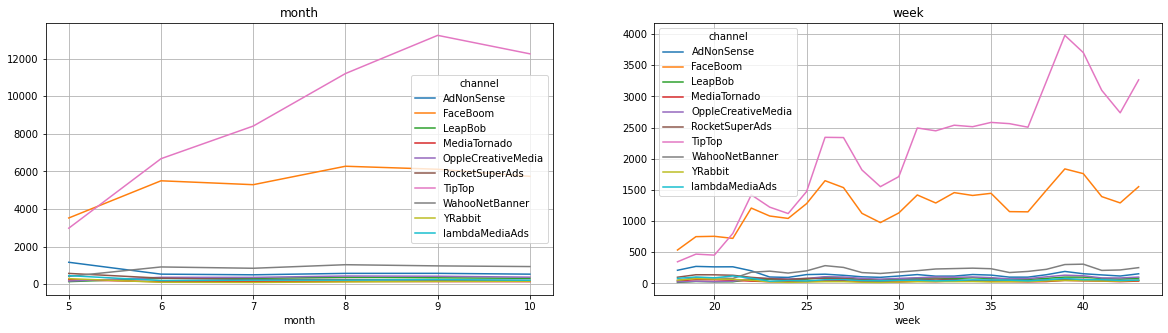

In [67]:
fig, ax = plt.subplots(1,2,figsize = (20, 5))
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(ax = ax[0])
ax[0].set_title('month')
ax[0].grid(which='both')
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(ax = ax[1])
ax[1].set_title('week')
ax[1].grid(which='both')

По месячному графику видно, что расходы для TipTop неуклонно растут и в конце они уже в 4 раза больше, чем на начало периода. Расходы на FaceBoom выросли всего в 1.5 раза, что значительно меньше. Остальные источники на месячном графике не показывают каких-либо значительных изменений с течением времени.

На недельном графике хорошо видно, что на цену разных рекламных источников влияют одни и те же события, только реакция у них разная. Скачки цен у TipTop гораздо сильнее, чем у других источников. Если недельный график FaceBoom после 25 недели держиться в пределах 1000-2000, показывая незначительный рост, то TipTop неуклонно растет.

### Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей

In [68]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Cнова подтверждается теория о том, что TipTop неоправданно дорогой источник. Стоимость привлечения почти в 3 раза больше, чем у FaceBoom, AdNonSence и в 4 раза больше, чем у lambdaMediaAds, которые показывают лучшее отношение платящих пользователей к количеству привлеченных из источника

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [69]:
# Задам горизонт и дату анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.loc[profiles['channel'] != 'organic'], orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV с течением времени растёт. Реклама не окупается(ROI не пересекает уровень окупаемости). ROI значительно ниже уровня окупаемости.

Динамика LTV держится в целом на хорошем уровне с редкими положительными скачками.
Динамика ROI к июлю падает ниже уровня окупаемости. Как и динамика стоимости.

Можно сделать вывод, что к снижению окупаемости привело увеличение рекламных расходов с июня-июля.

### Конверсия пользователей и динамика её изменения. Конверсия удержания пользователей. Графики конверсии и удержания

In [ ]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей до 6 лайфтайма быстро растёт, затем рост значительно снижается.

После июня конверсия пользователей значительно увеличилась и держится на уровне 0.55 с некоторыми положительными скачками.

In [ ]:
# смотрим удержание
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей падает с уровня 0.4 до 0.12. Удержание неплатящих пользователей падает с 0.17 до 0.

Динамики удержания платящих пользователей в целом держится на одном уровне в 0.100 c некоторыми положительными скачками.


### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV и динамика LTV на 14 день для Android, Mac, iPhone похожа, PC чуть ниже.

Для пользователей iPhone и Mac динамика стоимости привлечения сильно идет вверх и похожа. Стоимость привлечения пользователей Android ощутимо ниже, чем для iPhone и Mac. PC обладает лучшей динамикой стоимости привлечения, показывая незначительный рост на фоне роста других платформ.

Лучшие показатели ROI у PC и Android, также они смогли пересечь уровень окупаемости: PC на 7 день, а Android на 11. iPhone и Mac не смогли пересечь уровень окупаемости.

Динамика ROI с мая по июнь для всех похожа. Начиная с июня ROI для Android, iPhone и Mac падает до уровня окупаемости. После Android и Mac всегда находятся ниже уровня окупаемости. Android до августа выше уровня окупаемости, затем падает ниже. Иногда редкими скачками выходит на уровень окупаемости.

### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV пользователей из США(0.25-0.77) выше, чем у других стран(0.17-0.6). ROI для тех же пользователей из США(0.25-0.75) худший и не пересекает уровень окупаемости, а вот для других стран(0.5-2) уже на 4 день находится выше и продолжает расти.

Динамика LTV для США стаблильней и выше, чем у других стран. У других стран периодически происходят скачки до уровня США, а так они ниже и на одном уровне для всех.

Динамика ROI для США с самого начала идет вниз и к началу июля постоянно находятся ниже уровня окупаемости. Остальные страны ниже уровня 1.5 не опускаются и часто происходят положительные скачи окупаемости.

Динамика стоимости привлечения пользователей для Германии, Франции и Великобритании на одном уровне в 0.3. У США резкий подъём с июня и дальнейший сильной рост стоимости привлечения пользователей.

### Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Лучшие показатели LTV у TipTop и lambdaMediaAds. Хуже у FaceBoom, RocketSuperAds, WahooNetBanner, AdNonSense. Самые худшие показатели у organic, YRabbit, LeapBob, OppleCreativeMedia, MediaTornado.

Динамика LTV лучшая у lambdaMediaAds и TipTop. Остальные на одном уровне

ROI. Уровень окупаемости преодолели все источники рекламы, кроме AdNonSense, FaceBoom, TipTop.

Динамика ROI у всех примерно на одном уровне где-то чуть выше. FaceBoom, TipTop так и не смогли преодолеть уровень окупаемости. 
AdNonSense периодически окупается.

Динамика стоимости привлечения для всех, кроме TipTop, равномерная. У TipTop происходит рост в начале каждого месяца.

### Вопросы:

#### Окупается ли реклама, направленная на привлечение пользователей в целом?

Реклама, направленная на привлечение пользователей не окупается, так как компания терпит убытки. Также в п.7.1 выяснилось, что окупаемость рекламы значительно упала после роста цен на рекламу в июне-июле.

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Устройства.
Map и iPhone пользователи хоть и имеют более высокий LTV, но ROI ниже уровня окупаемости. Динамика стоимости привлечения для них выше, чем для Android и PC пользователей.

Страны.
Пользователи из США имеют болле высокий LTV, но ROI все ещё ниже уровня окупаемости. Динамика стоимости привлечения для них гораздо выше, чем для пользователей из других стран.

Рекламные каналы.
Основные рекламные средства были потрачены на рекламные каналы AdNonSense, FaceBoom, TipTop, но их ROI находится ниже уровня окупаемости. Динамика стоимости привлечения TipTop так и вовсе ударила по статье расходов на рекламу, она неуклонно растёт каждый месяц.

#### Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости вызваны комплексом причин. Неправильная ориентированность на регион. Слишком дорогое привлечение целевых платформ и дорогие рекламные каналы окончательно ударившие по кошельку компании.

## Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

### Причины неэффективности привлечения пользователей.

Причин неэффективности пользователей несколько:
- 1 причина: резкий рост стоимость рекламной компании
- 2 причина: целевые платформы iPhone и Mac не окупаются и их привлечение слишком дорого обходится компании
- 3 причина: привлечение пользователей из США слишком дорого обходится
- 4 причина: каналы с наибольшими тратами приносят не так много пользователей.

Суммируя, основная причина на мой взгляд это рекламный источник TipTop который и повлиял на стоимость привлечения пользователей с платформ iPhone и Mac из региона США, так как картинка увеличения стоимости этого рекламного канала очень сходна с графиками увеличения стоимости для платформ iPhone и Mac, и для региона США. Возможно это какая-то местная социальная сеть или ещё что-то

### Рекомендации для отдела маркетинга.

- Перераспределить расходы на рекламные каналы
- Обратить внимание на платформы PC и Android
- Уделить больше внимания пользователям из стран ЕС: Германия, Франция и Великобритания
- Снизить долю канала FaceBoom и TipTop. Обратить внимание на каналы: AdNonSense, lambdaMediaAds, WahooNetBanner, RocketSuperAds, OppleCreativeMedia, YRabbit, MediaTornado, LeapBob               